In [1]:
from MSCOCO import MSCOCO
from utils import *
from torch.utils import data
import random
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
coco_classes, coco_object_categories = load_coco_classes('./mscoco_labels.txt')

In [3]:
root_path = 'coco'
json_annotations = './json files/train_annotation.json'
target_classes = ['__bgr__', 'person', 'car']

test_interface_params = {
    'root_path': root_path,
    'list_of_classes': coco_classes,
    'target_classes': target_classes,
    'stage': 'test',
}

test_interface = MSCOCO(**test_interface_params)

test_dataloader_args = {'batch_size':1, 'shuffle':True}
test_dataloader = data.DataLoader(test_interface, **test_dataloader_args)

print(f"Test Loader Length: {len(test_dataloader)}")

Test Loader Length: 2869


In [4]:
device = torch.device('cpu')
if torch.cuda.is_available():
    device = torch.device('cuda')

print(f'Available device: {device}')

Available device: cuda


In [5]:
faster_rcnn_params = {
   "backbone":"resnet50",
    "num_classes": 3,
    "pretrained": True,
    "pretrained_backbone": True,
    "model_path": None 
}
faster_rcnn_50 = load_faster_rcnn(**faster_rcnn_params)

checkpoint_path = './models/model_backbone50'
epoch_50, model_50, training_loss_50 = load_model(faster_rcnn_50, checkpoint_path)

In [6]:
faster_rcnn_params = {
   "backbone":"resnet101",
    "num_classes": 3,
    "pretrained": True,
    "pretrained_backbone": True,
    "model_path": None 
}
faster_rcnn_101 = load_faster_rcnn(**faster_rcnn_params)

checkpoint_path = './models/model_backbone101'
epoch_101, model_101, training_loss_101 = load_model(faster_rcnn_101, checkpoint_path)

In [7]:
faster_rcnn_params = {
   "backbone":"resnet152",
    "num_classes": 3,
    "pretrained": True,
    "pretrained_backbone": True,
    "model_path": None 
}
faster_rcnn_152 = load_faster_rcnn(**faster_rcnn_params)

checkpoint_path = './models/model_backbone152'
epoch_152, model_152, training_loss_152 = load_model(faster_rcnn_152, checkpoint_path)

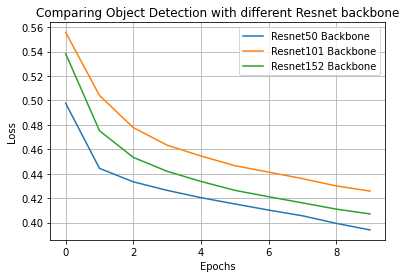

In [8]:
plt.plot(training_loss_50, label="Resnet50 Backbone")
plt.plot(training_loss_101, label="Resnet101 Backbone")
plt.plot(training_loss_152, label="Resnet152 Backbone")
plt.legend(loc='upper right')
plt.title('Comparing Object Detection with different Resnet backbone')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

In [9]:
%%time
mAP_50 = evaluate_mAP(model_50, test_dataloader, device)

/opt/conda/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ../c10/core/TensorImpl.h:1153.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


IoU metric: bbox
Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.3508046269416809
Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.5797387361526489
Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.3713712692260742
Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.17381387948989868
Average Precision  (AP) @[ IoU=0.50:0.95 | area= medium  | maxDets=100 ] = 0.3950815200805664
Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.47910839319229126
CPU times: user 24min 30s, sys: 42.9 s, total: 25min 13s
Wall time: 4min 53s


In [10]:
%%time
mAP_101 = evaluate_mAP(model_101, test_dataloader, device)

IoU metric: bbox
Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.2707103192806244
Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.5219841599464417
Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.2531725764274597
Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.1425362527370453
Average Precision  (AP) @[ IoU=0.50:0.95 | area= medium  | maxDets=100 ] = 0.31910333037376404
Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.33329474925994873
CPU times: user 34min 51s, sys: 54.3 s, total: 35min 45s
Wall time: 8min 42s


In [11]:
%%time
mAP_152 = evaluate_mAP(model_152, test_dataloader, device)

IoU metric: bbox
Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.31831222772598267
Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.5701292157173157
Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.3148704767227173
Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.15461787581443787
Average Precision  (AP) @[ IoU=0.50:0.95 | area= medium  | maxDets=100 ] = 0.3679177761077881
Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.4117858409881592
CPU times: user 43min 25s, sys: 1min 14s, total: 44min 40s
Wall time: 10min 30s


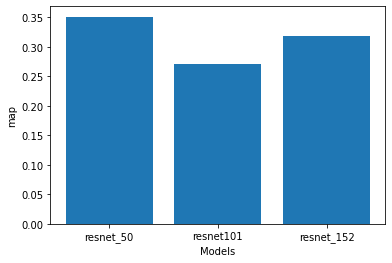

In [12]:
mAPs = [mAP_50, mAP_101, mAP_152]
metric = 'map'
titles = ['resnet_50', 'resnet101', 'resnet_152']
compare_mAP(mAPs, metric, titles)

In [ ]:

metric = 'map'
compare_mAP(mAPs, metric, titles)

In [ ]:
mAPs = [mAP_50, mAP_101, mAP_152]
metric = 'map'
titles = ['resnet_50', 'resnet101', 'resnet_152']
compare_mAP(mAPs, metric, titles)